<a href="https://colab.research.google.com/github/darshank528/Artificial-Neural-Network/blob/master/ANN_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

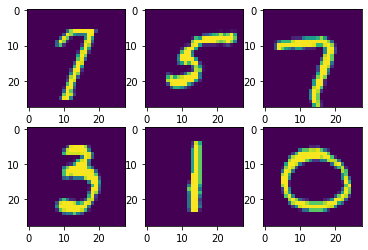

In [2]:
import torch
import torchvision
import torchvision.datasets as datasets
from torch.utils import data
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
import time

start_time=time.time()

#device configuration 
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#loading and preparing data
train_data = datasets.MNIST(r"C:\Users\Darshan Khandelwal\OneDrive\Desktop\MNIST",download=True,transform=transforms.ToTensor(),train=True)
test_data = datasets.MNIST(r"C:\Users\Darshan Khandelwal\OneDrive\Desktop\MNIST",download=False,transform=transforms.ToTensor(),train=False)
train_loader = data.DataLoader(dataset=train_data,batch_size=100,shuffle=True)
test_loader = data.DataLoader(dataset=test_data,batch_size=100)

#plotting some examples
example = iter(train_loader)
samples,labels = next(example)
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i,0])
plt.show()



epoch: 2 / 20  loss:56.8218
epoch: 4 / 20  loss:35.2122
epoch: 6 / 20  loss:28.0955
epoch: 8 / 20  loss:21.5663
epoch: 10 / 20  loss:17.3700
epoch: 12 / 20  loss:15.3233
epoch: 14 / 20  loss:13.1308
epoch: 16 / 20  loss:12.1135
epoch: 18 / 20  loss:10.5857
epoch: 20 / 20  loss:9.8093


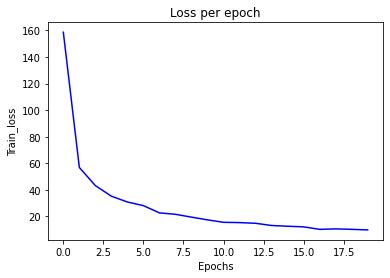

In [0]:
#defining the proposed model
class classifier(nn.Module):
  def __init__(self):
    super(classifier,self).__init__()
    self.conv1 = nn.Conv2d(1,32,3)
    self.conv2 = nn.Conv2d(32,64,3)
    self.pool = nn.MaxPool2d(2,2)
    self.drop1 = nn.Dropout(p=0.25)
    self.fc1 = nn.Linear(12*12*64,128)
    self.drop2 = nn.Dropout(p=0.5)
    self.fc2 = nn.Linear(128,10)

  def forward(self,X):
    X = torch.relu(self.conv1(X))
    X = torch.relu(self.conv2(X))
    X = self.pool(X)
    X = X.view(-1,12*12*64)
    X = self.drop1(X)
    X = torch.relu(self.fc1(X))
    X = self.drop2(X)
    X = self.fc2(X)
    return X

#initializing model
model = classifier().to(device)

#hyperparameters
num_epochs=20
learn_rate=0.001
num_iterations=len(train_loader)
batch_size=100

#defining the loss criteria to be used
criterion = nn.CrossEntropyLoss()

#defining the optimizer
optimizer = optim.Adam(model.parameters(),lr=learn_rate)

train_loss=[]
#training our model
for e in range(num_epochs):
  tr_loss=0
  model.train()

  for i,(samples,labels) in enumerate(train_loader):
    samples = samples.to(device)
    labels = labels.to(device)
    #model predictions
    y_predicted = model(samples)
    #cost
    cost = criterion(y_predicted,labels)
    tr_loss+=cost.item()
    #calculate gradients
    cost.backward()
    #update parameters
    optimizer.step()
    #avoid accumulation of gradients
    optimizer.zero_grad()
  #printing loss per 2 epochs
  if (e+1)%2 == 0:
    print("epoch:",e+1,"/",num_epochs," loss:{0:.4f}".format(tr_loss))
  train_loss.append(tr_loss) 

#plotting loss per epoch 
plt.plot(train_loss,color="b")
plt.xlabel("Epochs")
plt.ylabel("Train_loss")
plt.title("Loss per epoch")
plt.show()


In [0]:
#evaluating our trained model on test data
with torch.no_grad():
  
  model.eval()
  n_samples = 0
  n_correct = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]

  for (samples,labels) in test_loader:
    samples = samples.to(device)
    labels = labels.to(device)
    y_pred = model(samples)
    _,prediction = torch.max(y_pred,1)
    n_samples+= labels.shape[0]
    n_correct+= (prediction == labels).sum().item()

    for i in range(batch_size):
      label = labels[i].item()
      predict = prediction[i].item()
      if label == predict:
        n_class_correct[label]+= 1
      n_class_samples[label]+= 1
  
  #printing overall accuracy
  accuracy = 100*n_correct/(float)(n_samples)
  print("Overall accuracy of system: {0:.2f}%".format(accuracy))  

  #printing accuracy of each class
  for i in range(10):
    acc=100*n_class_correct[i]/n_class_samples[i]
    print("Accuracy of digit",i,"= {:.2f}%".format(acc)) 

#print("Time taken by CPU model= {:.2f} sec".format(time.time()-start_time))-----output=2665.37sec
print("Time taken by GPU model= {:.2f} sec".format(time.time()-start_time))  

Overall accuracy of system: 99.26%
Accuracy of digit 0 = 99.59%
Accuracy of digit 1 = 99.91%
Accuracy of digit 2 = 99.52%
Accuracy of digit 3 = 99.11%
Accuracy of digit 4 = 99.49%
Accuracy of digit 5 = 99.22%
Accuracy of digit 6 = 99.06%
Accuracy of digit 7 = 98.74%
Accuracy of digit 8 = 99.18%
Accuracy of digit 9 = 98.71%
Time taken by GPU model= 135.37 sec
